In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


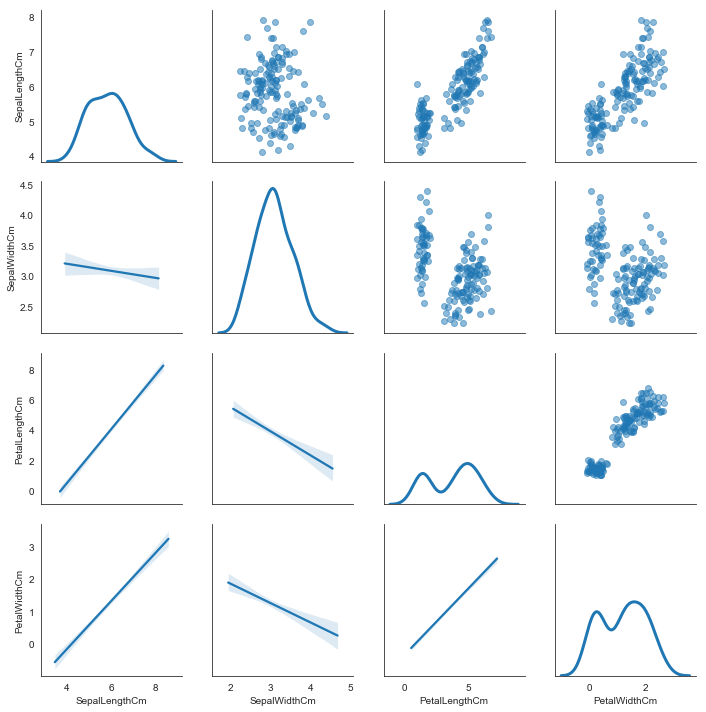

In [3]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('iris.csv')

# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    (df['Species'] == 'Iris-setosa') | (df['Species'] == 'Iris-versicolor') | (df['Species'] == 'Iris-virginica'),
    ['Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'SepalLengthCm':'PetalWidthCm'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
     np.random.uniform(.3, -.3, size=(df_jittered.shape)),
     columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna())
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


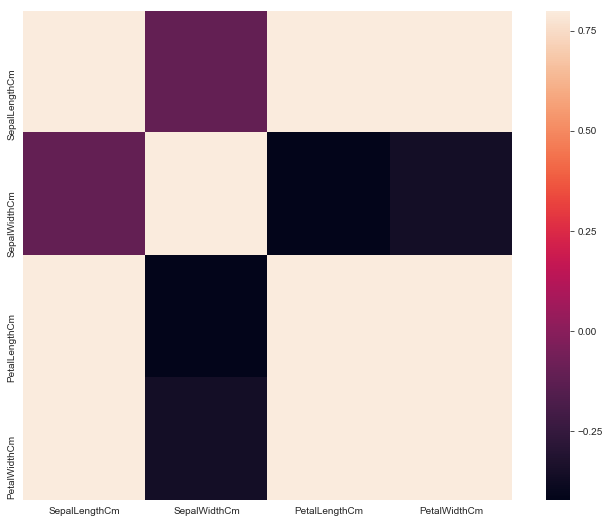

In [4]:
# Make the correlation matrix.
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


In [9]:

df_jittered['PetalLong'] = np.where(df['PetalLengthCm']>=4, 1, 0)
df_jittered['SepalLong'] = np.where(df['SepalLengthCm']>=5, 1, 0)
df_jittered['total'] = df_jittered['SepalLong'] + df_jittered['PetalLong']

df_czch.groupby(df_jittered['PetalLong']).describe()
df_czch.groupby(df_jittered['SepalLong']).describe()
df_jittered.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalLong,SepalLong,total
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.840399,3.091107,3.767887,1.197442,0.593333,0.853333,1.446667
std,0.844535,0.452710,1.784736,0.791909,0.492857,0.354958,0.728487
min,4.123993,2.222765,1.004124,-0.089952,0.000000,0.000000,0.000000
25%,5.142655,2.753764,1.643650,0.394632,0.000000,1.000000,1.000000
50%,5.827278,3.079621,4.244645,1.291712,1.000000,1.000000,2.000000
75%,6.433555,3.388613,5.184600,1.866372,1.000000,1.000000,2.000000
max,7.920482,4.390747,6.767947,2.660944,1.000000,1.000000,2.000000
